In [4]:
import pandas as pd
!pip install panda

In [27]:
file = 'C:\\Users\\user\\OneDrive - King Abdullaziz University\\Desktop\\Dev\\AI\\Online_Retail.xlsx'
df = pd.read_excel(file)
df = pd.DataFrame(df)

In [28]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,NaN,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [29]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1455
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [30]:
df.drop('CustomerID', axis=1,inplace=True)
df.drop('Description', axis=1,inplace=True)
df.drop('InvoiceDate', axis=1,inplace=True)

In [31]:

num_col = df.select_dtypes(include=["number"]).columns.tolist()
cat_col = df.select_dtypes(include=["object"]).columns.tolist()
print(cat_col)
print(num_col)
for col in cat_col:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value,inplace=True)

for col in num_col:
    df[col].fillna(df[col].mean(),inplace=True)

['InvoiceNo', 'StockCode', 'Country']
['Quantity', 'UnitPrice']


In [32]:
df

,InvoiceNo,StockCode,Quantity,UnitPrice,Country
0,536365,85123A,6,2.55,United Kingdom
1,536365,71053,6,3.39,United Kingdom
2,536365,84406B,8,2.75,United Kingdom
3,536365,84029G,6,3.39,United Kingdom
4,536365,84029E,6,3.39,United Kingdom
...,...,...,...,...,...
541904,581587,22613,12,0.85,France
541905,581587,22899,6,2.10,France
541906,581587,23254,4,4.15,France
541907,581587,23255,4,4.15,France


In [33]:
from sklearn.preprocessing import StandardScaler

In [40]:
x = ['Quantity', 'UnitPrice']
x1 = df[x]


In [43]:
x_scl = StandardScaler().fit_transform(x1)
print(x_scl)

[[-0.01628867 -0.02130135]
 [-0.01628867 -0.01262006]
 [-0.00711777 -0.01923438]
 ...
 [-0.02545958 -0.00476555]
 [-0.02545958 -0.00476555]
 [-0.03004503  0.00350235]]


In [44]:
from sklearn.decomposition import PCA

In [45]:
dim_red = PCA()

In [46]:
x_pca = dim_red.fit_transform(x_scl)

In [48]:
x_pca.shape

(541909, 2)

In [49]:
dim_red.components_

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [51]:
dim_red.explained_variance_ratio_

array([0.50061746, 0.49938254])

In [53]:
dim_red.get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

In [59]:
df_pca = pd.DataFrame(x_pca,columns= dim_red.get_feature_names_out())

In [60]:
df_pca

,pca0,pca1
0,-0.003544,-0.026580
1,0.002594,-0.020442
2,-0.008568,-0.018634
3,0.002594,-0.020442
4,0.002594,-0.020442
...,...,...
541904,-0.035422,-0.019549
541905,-0.006833,-0.029869
541906,0.014633,-0.021372
541907,0.014633,-0.021372


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


C:\Users\user\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\Do

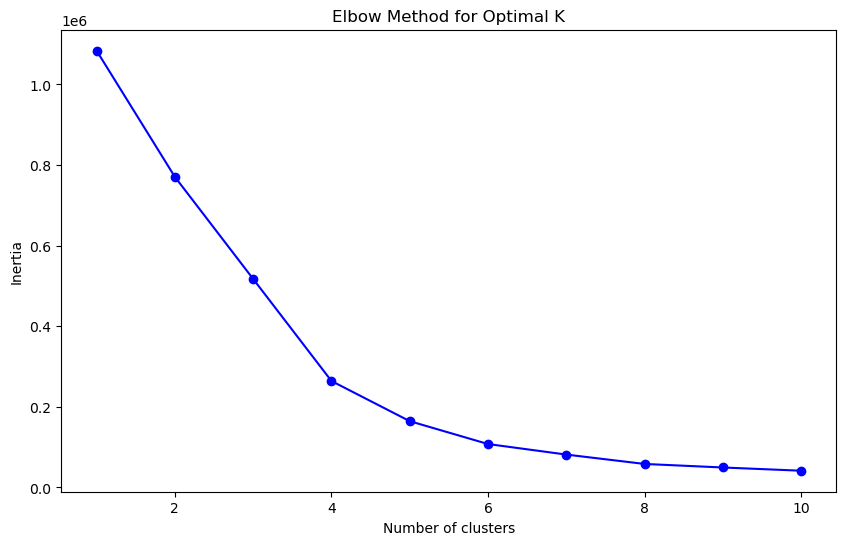

In [65]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

C:\Users\user\Downloads\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


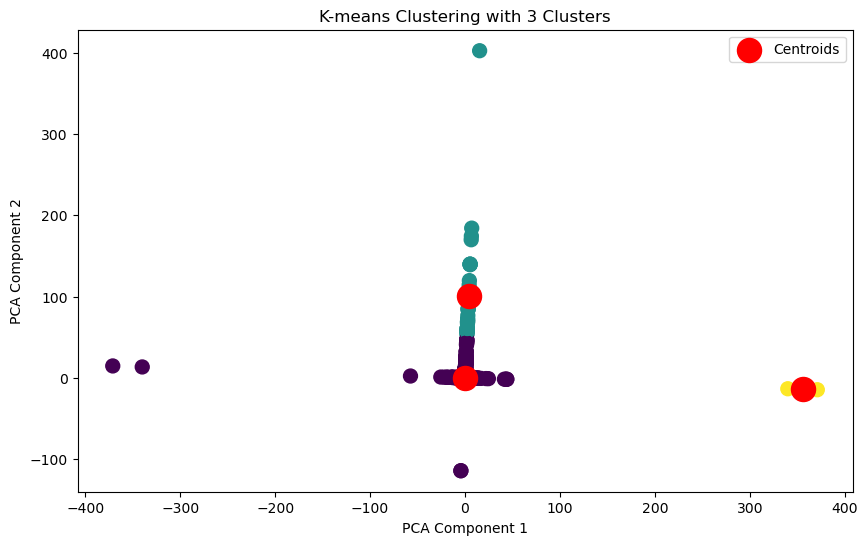

ValueError: Shape of passed values is (3, 2), indices imply (3, 5)

In [68]:
# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_pca)

# Dimensionality reduction using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(x_pca)

# Add cluster labels to the original dataframe
df_pca['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', marker='o', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with 3 Clusters')
plt.legend()
plt.show()

# Analyze cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_)), columns=df.columns[:-1])
centroids['Cluster'] = range(0, len(centroids))
print("Cluster Centroids:")
print(centroids)

# Show the dataframe with cluster assignments
print("Data with Cluster Assignments:")
print(df_pca)

In [70]:
cluster_profiles = df.groupby('Cluster').agg({
    'Quantity': ['mean', 'sum'],
    'UnitPrice': ['mean', 'sum']
})

cluster_profiles.columns = ['_'.join(col).strip() for col in cluster_profiles.columns.values]

print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
         Quantity_mean  Quantity_sum  UnitPrice_mean  UnitPrice_sum
Cluster                                                            
0             9.839308       5331685        4.054723    2197157.324
1            -0.806452           -25     9730.436452     301643.530
2        -77605.000000       -155210        1.560000          3.120


In [71]:
wcss = kmeans.inertia_
print(f'Within-Cluster Sum of Squares (WCSS): {wcss:.2f}')

Within-Cluster Sum of Squares (WCSS): 517269.55


In [77]:
# Select only numeric columns for clustering analysis
numeric_cols = df.select_dtypes(include='number')

# Group by cluster and calculate mean of numeric features
cluster_analysis = numeric_cols.groupby('Cluster').mean()

# Display cluster analysis
print(cluster_analysis)

for cluster, data in cluster_analysis.iterrows():
    print(f"Cluster {cluster} recommendations:")
    # Provide recommendations based on cluster characteristics
    if data['Average Spending'] > 100:
        print("Consider offering premium products or loyalty rewards.")
    elif data['Purchase Frequency'] < 10:
        print("Promote bundle offers or discounts to increase purchase frequency.")
    else:
        print("Focus on customer engagement and personalized communication.")
    print()

             Quantity    UnitPrice
Cluster                           
0            9.839308     4.054723
1           -0.806452  9730.436452
2       -77605.000000     1.560000
Cluster 0 recommendations:


KeyError: 'Average Spending'

### Personalized Marketing: Tailor marketing efforts based on customer segments to improve engagement and conversion rates.

### Retention Strategies: Develop targeted campaigns to retain at-risk customers within each segment, enhancing satisfaction and loyalty.

### Inventory Optimization: Analyze purchase patterns to optimize inventory management and reduce costs.

### Enhanced Product Recommendations: Improve recommendation systems to suggest relevant items based on segment preferences, driving repeat purchases.

### Customer Experience: Personalize the customer journey to enhance satisfaction and foster brand loyalty.

### Market Expansion: Identify growth opportunities by targeting niche markets or emerging trends within segments.






